In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [54]:
# Baca dataset iris.csv
data = pd.read_csv('/content/drive/MyDrive/UAS AI/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
print("This Iris dataset is consised of",len(data),"rows.")

This Iris dataset is consised of 150 rows.


In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [58]:
# Split dataset menjadi fitur dan label
y = data['species'].values
X = data.drop('species', axis=1)

In [59]:
# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [60]:
# Inisialisasi model
model = Sequential()

In [72]:
# Input layer
model.add(Dense(16, activation='relu', input_dim=4))
# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

In [73]:
# Output layer
model.add(Dense(16, activation='softmax'))

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.5246 - accuracy: 0.6804
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.6082
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.6186
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.6804
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.6804
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.5670
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.6392
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.6495
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.6804
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.6804
Epoch 11/100
4/4 [===========

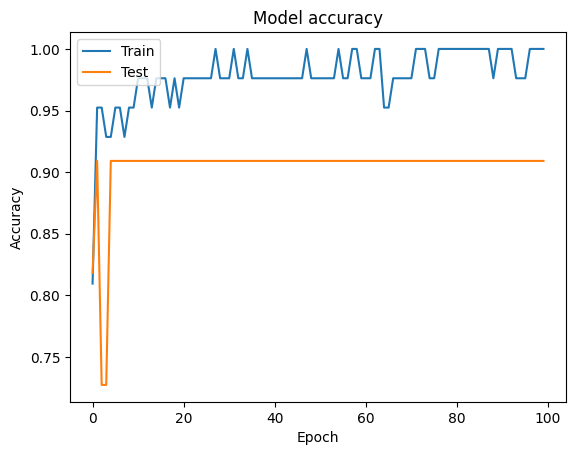

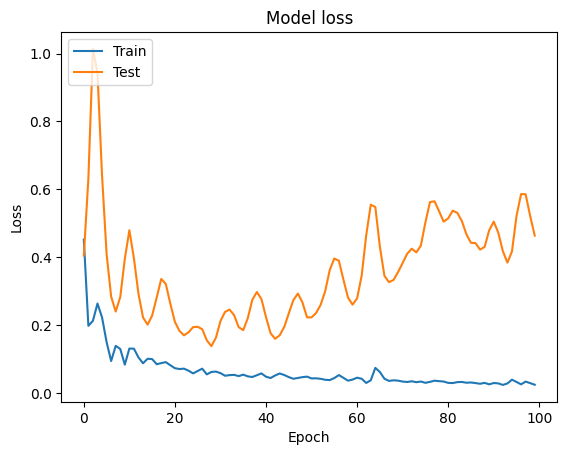

In [76]:
# Optimizer
optimizer = Adam(learning_rate=0.001)

# Compile model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

history = model.fit(X_test, y_test, validation_split=0.20, epochs=100, batch_size=32, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [77]:
# Evaluasi model menggunakan data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('hasil accuracy klasifikasi dataset iris dengan ANN')
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

hasil accuracy klasifikasi dataset iris dengan ANN
Test loss: 0.1190
Test accuracy: 0.9623
